In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import glob
import os

# Get all CSV files from the falling_data folder
folder_path = r"C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\jerking_data"
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

print(f"Found {len(csv_files)} CSV files in the folder:")
for file in csv_files:
    print(f"  - {os.path.basename(file)}")

# Read all CSV files and concatenate them into a single dataframe
df_list = []
for file in csv_files:
    df_temp = pd.read_csv(file)
    df_list.append(df_temp)

# Concatenate all dataframes
df_full = pd.concat(df_list, ignore_index=True)

print(f"\nCombined dataframe shape: {df_full.shape}")
print(f"Total rows: {df_full.shape[0]}")
print(f"Total columns: {df_full.shape[1]}")
print(f"\nFirst few rows:")
df_full.head()


Found 31 CSV files in the folder:
  - jerking_20260104_113008.csv
  - jerking_20260104_113042.csv
  - jerking_20260104_113055.csv
  - jerking_20260104_113122.csv
  - jerking_20260104_113218.csv
  - jerking_20260104_113228.csv
  - jerking_20260104_113246.csv
  - jerking_20260104_113302.csv
  - jerking_20260104_113357.csv
  - jerking_20260104_113414.csv
  - jerking_20260104_113422.csv
  - jerking_20260104_113429.csv
  - jerking_20260104_113434.csv
  - jerking_20260104_113458.csv
  - jerking_20260104_113517.csv
  - jerking_20260104_113525.csv
  - jerking_20260104_113546.csv
  - jerking_20260104_113554.csv
  - jerking_20260104_113600.csv
  - jerking_20260104_113608.csv
  - jerking_20260104_113754.csv
  - jerking_20260104_113806.csv
  - jerking_20260104_113816.csv
  - jerking_20260104_113823.csv
  - jerking_20260104_113851.csv
  - jerking_20260104_113857.csv
  - jerking_20260104_113903.csv
  - jerking_20260104_113909.csv
  - jerking_20260104_113916.csv
  - jerking_20260104_113954.csv
  - je

,device,ax_max,ax_min,ax_mean,ay_max,ay_min,ay_mean,az_max,az_min,az_mean,gx_max,gx_min,gx_mean,gy_max,gy_min,gy_mean,gz_max,gz_min,gz_mean,activity
0,B,0.025513,-0.030396,0.000885,0.020874,-0.030640,-0.001855,0.025879,-0.024292,-0.002371,6.164551,-4.638672,-0.221354,3.906251,-5.676271,0.218506,2.014160,-2.136230,0.019531,jerking
1,A,0.397705,-0.009644,0.016075,0.269897,-0.036499,0.011175,0.041382,-1.316528,-0.048722,2.136230,-36.010742,-0.994466,1.220704,-49.316422,-1.585287,0.854492,-16.540527,-0.523682,jerking
2,B,0.299683,-0.621582,-0.001385,0.375366,-0.456787,0.004613,0.339233,-0.270996,0.002755,87.890656,-50.415054,0.360921,53.710953,-19.592285,1.036377,21.850586,-16.174316,0.258382,jerking
3,A,0.397705,-0.684326,-0.006122,0.283691,-0.627197,-0.011528,2.760620,-1.316528,0.058035,67.932129,-48.156754,0.931396,48.950211,-49.316422,1.786703,16.967773,-16.540527,0.540365,jerking
4,B,0.631836,-0.621582,0.006120,0.474731,-0.456787,-0.003926,0.339233,-0.396851,-0.018533,87.890656,-90.148956,-0.834147,53.710953,-53.771988,-0.616048,21.850586,-21.423340,-0.205892,jerking


In [8]:
# seperate the dataframe for device A and device B data
# Separate the df based on device type
df_A = df_full[df_full['device'] == 'A'].reset_index(drop=True)
df_B = df_full[df_full['device'] == 'B'].reset_index(drop=True)

print(f"Device A samples: {len(df_A)}")
print(f"Device B samples: {len(df_B)}")
print(df_A)

Device A samples: 137
Device B samples: 137
    device    ax_max    ax_min   ax_mean    ay_max    ay_min   ay_mean  \
0        A  0.397705 -0.009644  0.016075  0.269897 -0.036499  0.011175   
1        A  0.397705 -0.684326 -0.006122  0.283691 -0.627197 -0.011528   
2        A  0.690186 -0.684326 -0.000028  0.636475 -0.627197  0.003141   
3        A  0.690186 -0.684326 -0.017041  0.636475 -0.627197 -0.010013   
4        A  0.021729 -0.013306  0.000181  0.037109 -0.062866 -0.006663   
..     ...       ...       ...       ...       ...       ...       ...   
132      A  0.013306 -0.012329  0.000601  0.065918 -0.104736 -0.000804   
133      A  0.013306 -0.012329  0.000298  0.048584 -0.045288  0.000103   
134      A  0.912109 -0.649048  0.032483  3.023804 -2.186523  0.064802   
135      A  0.912109 -0.913696 -0.000201  3.023804 -2.885864  0.051035   
136      A  0.912109 -0.913696  0.007275  3.023804 -2.885864 -0.000535   

       az_max    az_min   az_mean      gx_max      gx_min   gx_mean

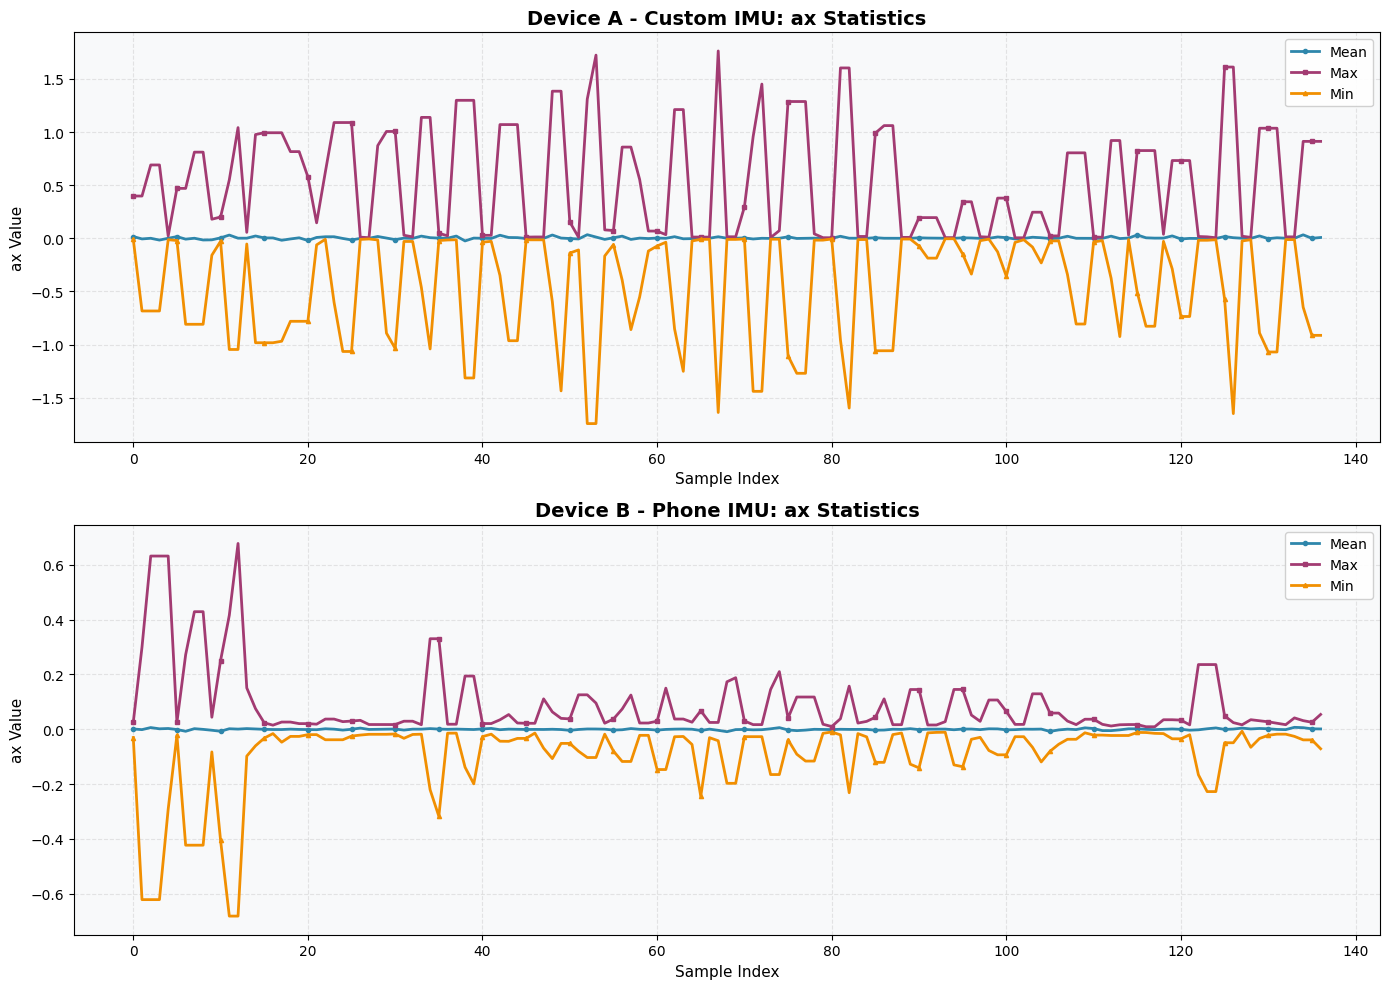

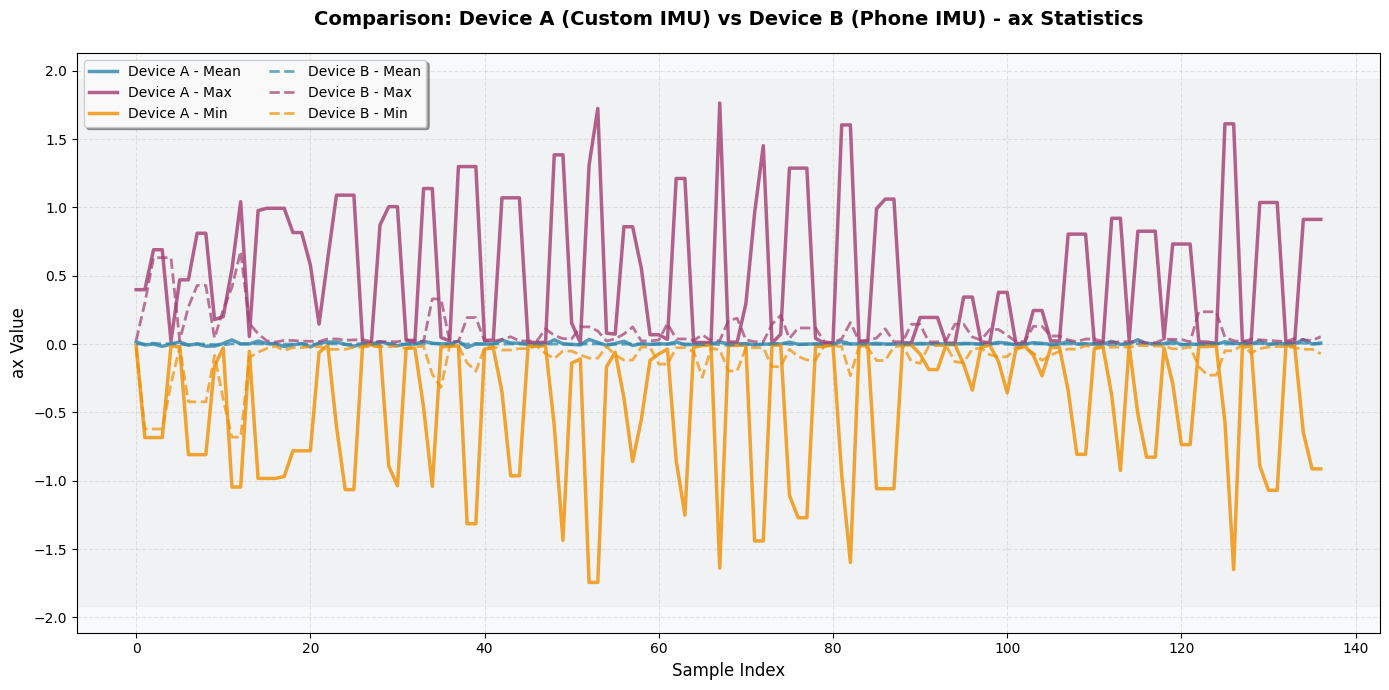

In [12]:
# Professional plot for ax mean, max, min for Device A and Device B
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Device A plot
axes[0].plot(df_A['ax_mean'], label='Mean', color='#2E86AB', linewidth=2, marker='o', markersize=3, markevery=5)
axes[0].plot(df_A['ax_max'], label='Max', color='#A23B72', linewidth=2, marker='s', markersize=3, markevery=5)
axes[0].plot(df_A['ax_min'], label='Min', color='#F18F01', linewidth=2, marker='^', markersize=3, markevery=5)
axes[0].set_title('Device A - Custom IMU: ax Statistics', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sample Index', fontsize=11)
axes[0].set_ylabel('ax Value', fontsize=11)
axes[0].legend(loc='best', fontsize=10, framealpha=0.9)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_facecolor('#f8f9fa')

# Device B plot
axes[1].plot(df_B['ax_mean'], label='Mean', color='#2E86AB', linewidth=2, marker='o', markersize=3, markevery=5)
axes[1].plot(df_B['ax_max'], label='Max', color='#A23B72', linewidth=2, marker='s', markersize=3, markevery=5)
axes[1].plot(df_B['ax_min'], label='Min', color='#F18F01', linewidth=2, marker='^', markersize=3, markevery=5)
axes[1].set_title('Device B - Phone IMU: ax Statistics', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sample Index', fontsize=11)
axes[1].set_ylabel('ax Value', fontsize=11)
axes[1].legend(loc='best', fontsize=10, framealpha=0.9)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_facecolor('#f8f9fa')

plt.tight_layout()
plt.show()

# Alternative: Combined plot with clear distinction
plt.figure(figsize=(14, 7))

# Device A with solid lines
plt.plot(df_A['ax_mean'], label='Device A - Mean', color='#2E86AB', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['ax_max'], label='Device A - Max', color='#A23B72', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['ax_min'], label='Device A - Min', color='#F18F01', linewidth=2.5, linestyle='-', alpha=0.8)

# Device B with dashed lines
plt.plot(df_B['ax_mean'], label='Device B - Mean', color='#2E86AB', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['ax_max'], label='Device B - Max', color='#A23B72', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['ax_min'], label='Device B - Min', color='#F18F01', linewidth=2, linestyle='--', alpha=0.7)

plt.title('Comparison: Device A (Custom IMU) vs Device B (Phone IMU) - ax Statistics', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('ax Value', fontsize=12)
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')

# Add subtle background shading to distinguish regions
plt.axhspan(plt.ylim()[0], plt.ylim()[1], alpha=0.05, color='gray')

plt.tight_layout()
plt.show()


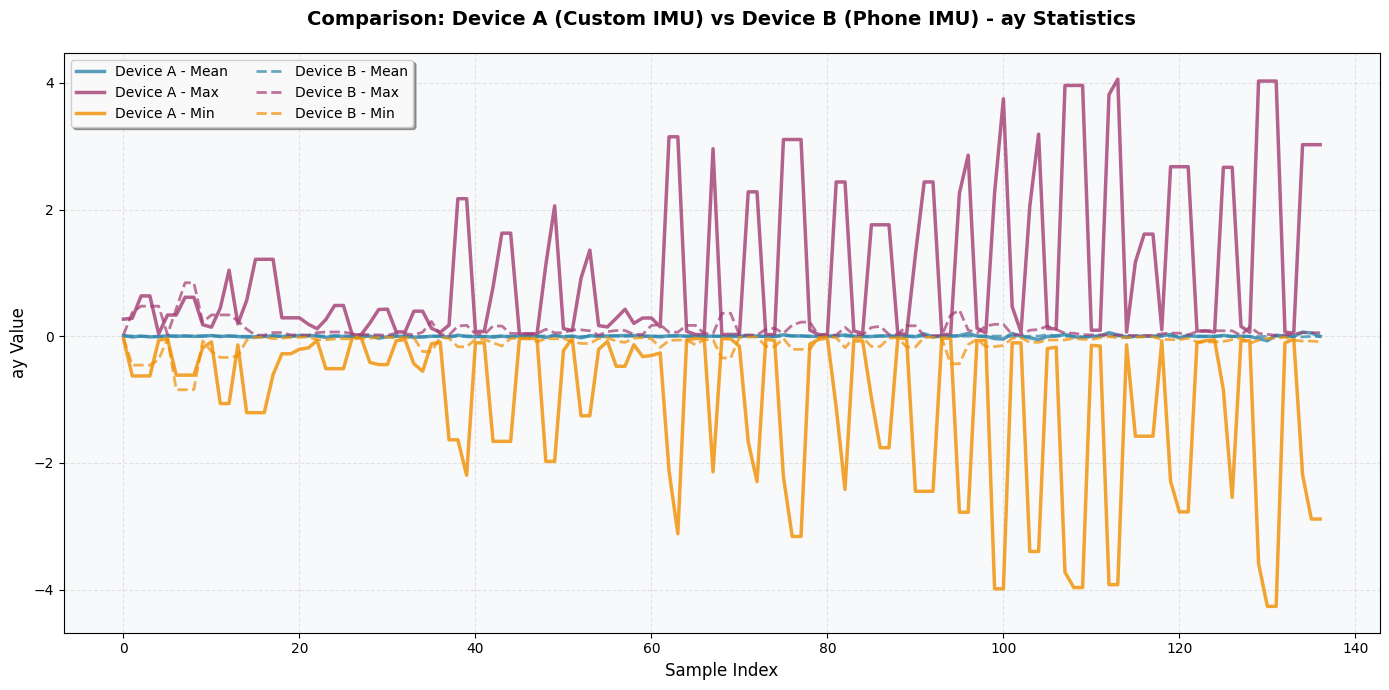

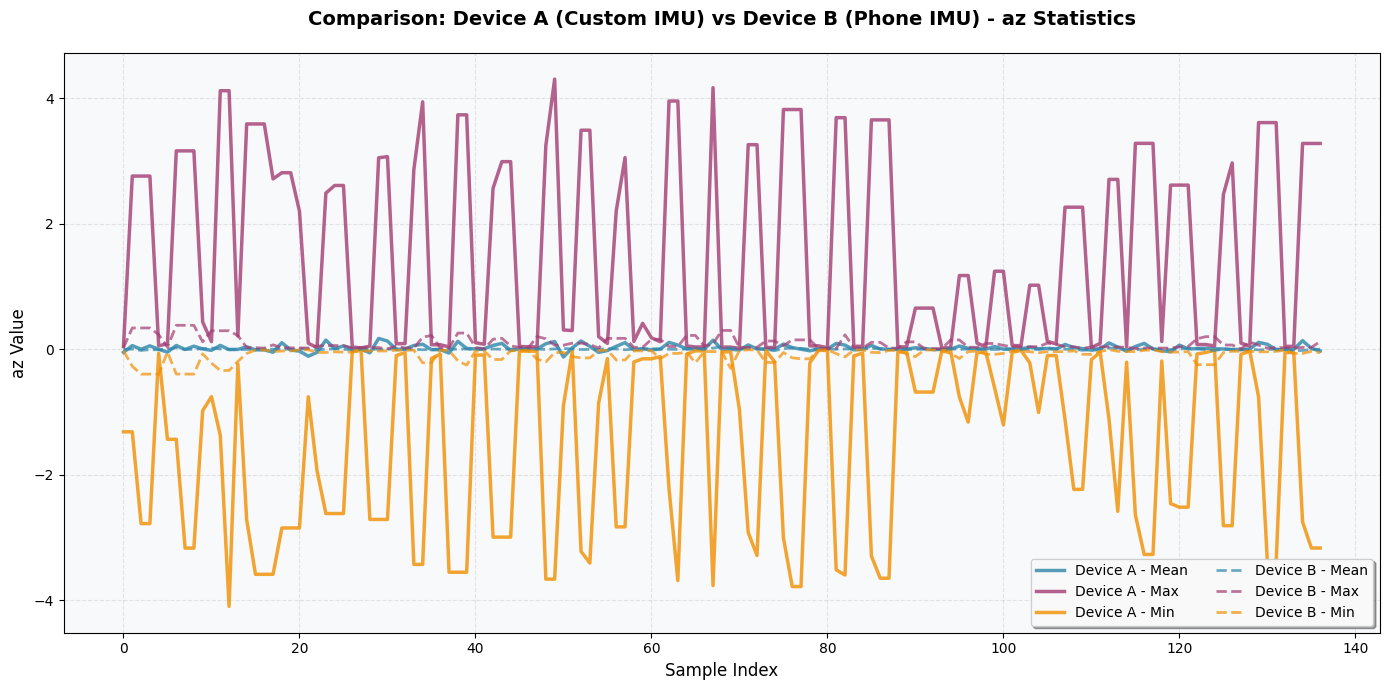

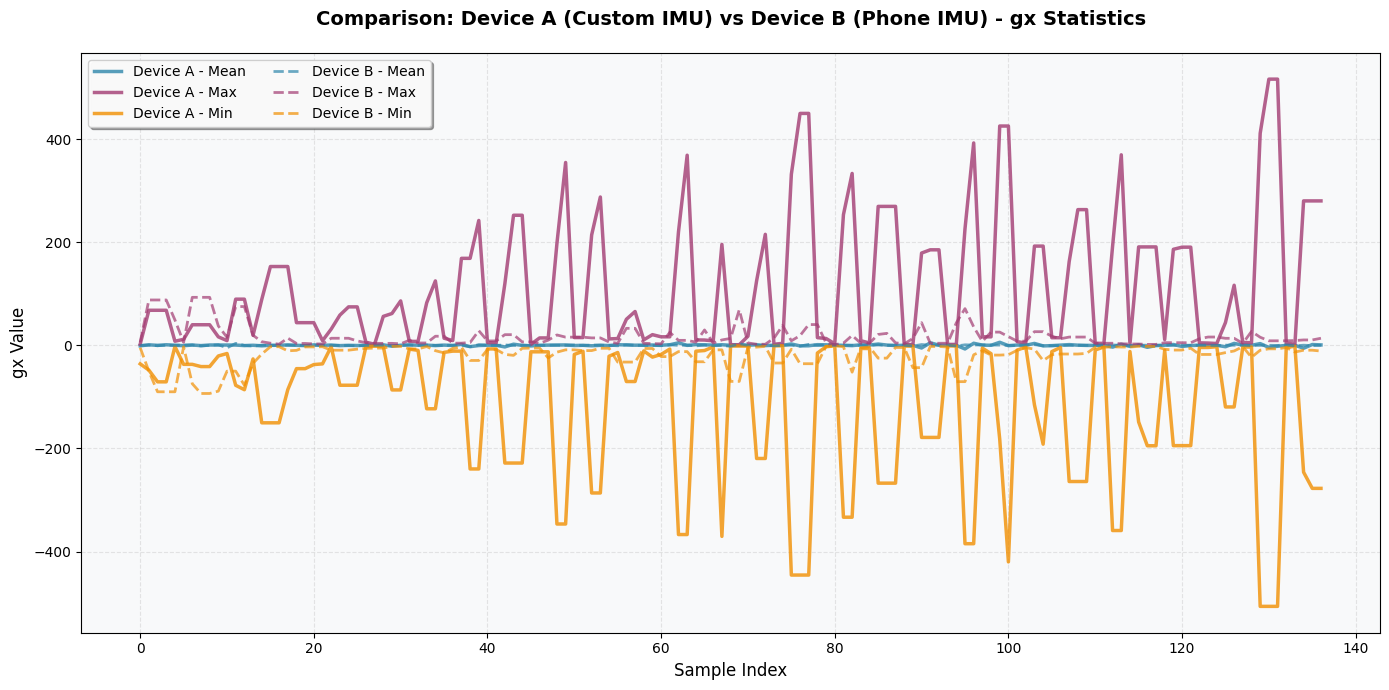

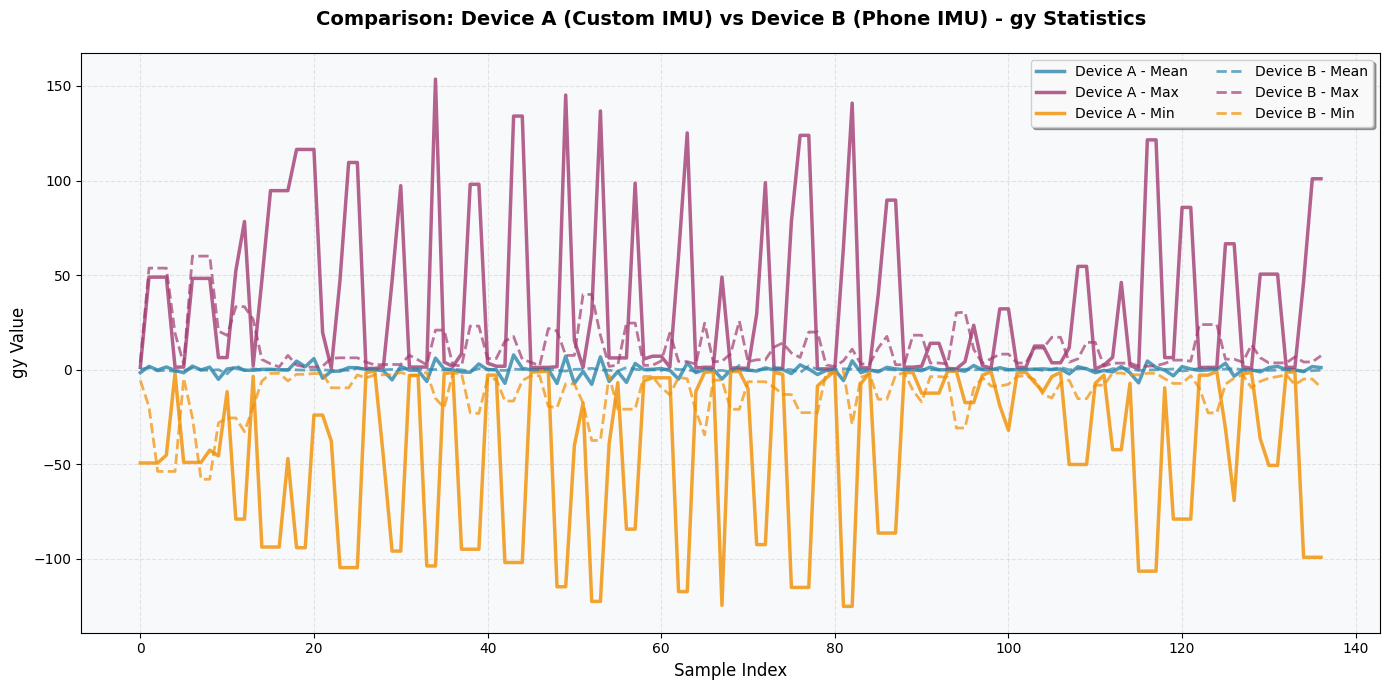

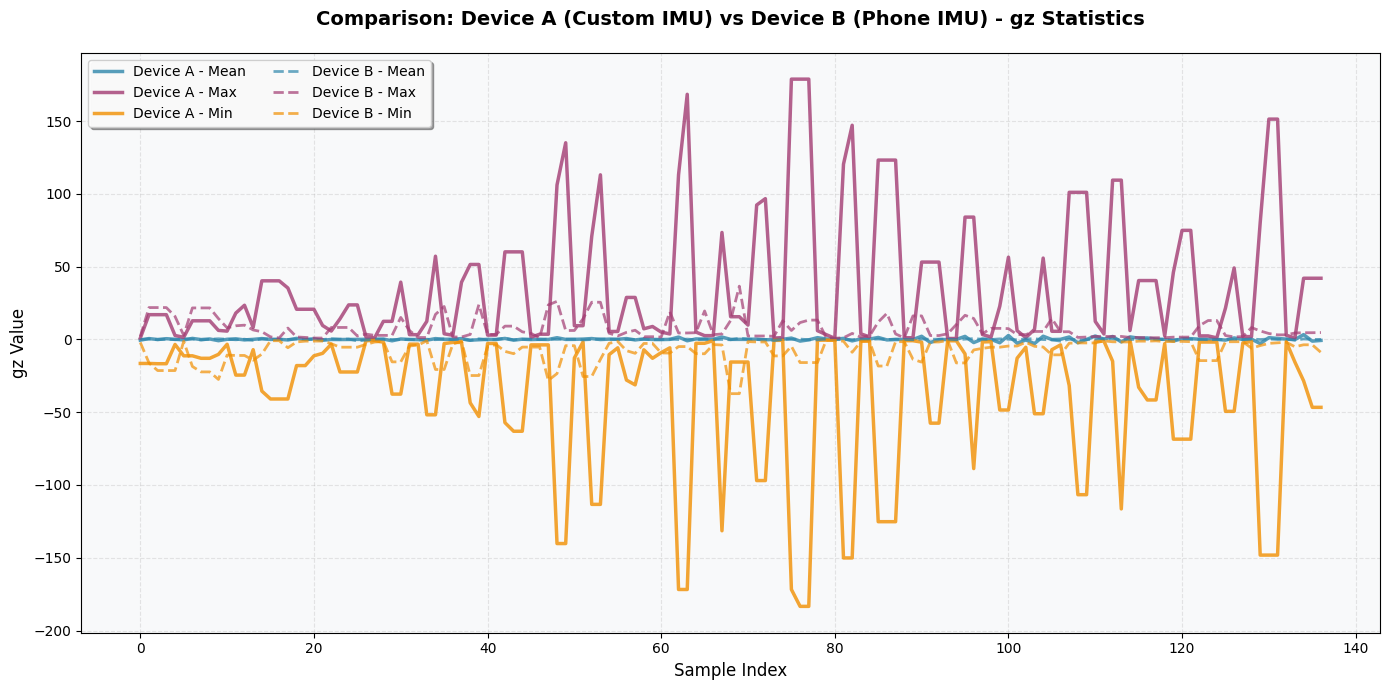

In [13]:
# Professional plot for ay statistics - Device A vs Device B
plt.figure(figsize=(14, 7))

# Device A with solid lines
plt.plot(df_A['ay_mean'], label='Device A - Mean', color='#2E86AB', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['ay_max'], label='Device A - Max', color='#A23B72', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['ay_min'], label='Device A - Min', color='#F18F01', linewidth=2.5, linestyle='-', alpha=0.8)

# Device B with dashed lines
plt.plot(df_B['ay_mean'], label='Device B - Mean', color='#2E86AB', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['ay_max'], label='Device B - Max', color='#A23B72', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['ay_min'], label='Device B - Min', color='#F18F01', linewidth=2, linestyle='--', alpha=0.7)

plt.title('Comparison: Device A (Custom IMU) vs Device B (Phone IMU) - ay Statistics', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('ay Value', fontsize=12)
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

# Professional plot for az statistics - Device A vs Device B
plt.figure(figsize=(14, 7))

# Device A with solid lines
plt.plot(df_A['az_mean'], label='Device A - Mean', color='#2E86AB', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['az_max'], label='Device A - Max', color='#A23B72', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['az_min'], label='Device A - Min', color='#F18F01', linewidth=2.5, linestyle='-', alpha=0.8)

# Device B with dashed lines
plt.plot(df_B['az_mean'], label='Device B - Mean', color='#2E86AB', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['az_max'], label='Device B - Max', color='#A23B72', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['az_min'], label='Device B - Min', color='#F18F01', linewidth=2, linestyle='--', alpha=0.7)

plt.title('Comparison: Device A (Custom IMU) vs Device B (Phone IMU) - az Statistics', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('az Value', fontsize=12)
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

# Professional plot for gx statistics - Device A vs Device B
plt.figure(figsize=(14, 7))

# Device A with solid lines
plt.plot(df_A['gx_mean'], label='Device A - Mean', color='#2E86AB', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['gx_max'], label='Device A - Max', color='#A23B72', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['gx_min'], label='Device A - Min', color='#F18F01', linewidth=2.5, linestyle='-', alpha=0.8)

# Device B with dashed lines
plt.plot(df_B['gx_mean'], label='Device B - Mean', color='#2E86AB', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['gx_max'], label='Device B - Max', color='#A23B72', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['gx_min'], label='Device B - Min', color='#F18F01', linewidth=2, linestyle='--', alpha=0.7)

plt.title('Comparison: Device A (Custom IMU) vs Device B (Phone IMU) - gx Statistics', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('gx Value', fontsize=12)
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

# Professional plot for gy statistics - Device A vs Device B
plt.figure(figsize=(14, 7))

# Device A with solid lines
plt.plot(df_A['gy_mean'], label='Device A - Mean', color='#2E86AB', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['gy_max'], label='Device A - Max', color='#A23B72', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['gy_min'], label='Device A - Min', color='#F18F01', linewidth=2.5, linestyle='-', alpha=0.8)

# Device B with dashed lines
plt.plot(df_B['gy_mean'], label='Device B - Mean', color='#2E86AB', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['gy_max'], label='Device B - Max', color='#A23B72', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['gy_min'], label='Device B - Min', color='#F18F01', linewidth=2, linestyle='--', alpha=0.7)

plt.title('Comparison: Device A (Custom IMU) vs Device B (Phone IMU) - gy Statistics', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('gy Value', fontsize=12)
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

# Professional plot for gz statistics - Device A vs Device B
plt.figure(figsize=(14, 7))

# Device A with solid lines
plt.plot(df_A['gz_mean'], label='Device A - Mean', color='#2E86AB', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['gz_max'], label='Device A - Max', color='#A23B72', linewidth=2.5, linestyle='-', alpha=0.8)
plt.plot(df_A['gz_min'], label='Device A - Min', color='#F18F01', linewidth=2.5, linestyle='-', alpha=0.8)

# Device B with dashed lines
plt.plot(df_B['gz_mean'], label='Device B - Mean', color='#2E86AB', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['gz_max'], label='Device B - Max', color='#A23B72', linewidth=2, linestyle='--', alpha=0.7)
plt.plot(df_B['gz_min'], label='Device B - Min', color='#F18F01', linewidth=2, linestyle='--', alpha=0.7)

plt.title('Comparison: Device A (Custom IMU) vs Device B (Phone IMU) - gz Statistics', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('gz Value', fontsize=12)
plt.legend(loc='best', fontsize=10, ncol=2, framealpha=0.95, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()


In [25]:
# Concatenate device A and device B dataframes side by side (as extra columns)
# Merge corresponding Device A and Device B files horizontally
df_merged = pd.concat([df_A.add_suffix('_A'), df_B.add_suffix('_B')], axis=1)

print(f"Merged dataframe shape: {df_merged.shape}")
df_merged.head()

Merged dataframe shape: (137, 40)


,device_A,ax_max_A,ax_min_A,ax_mean_A,ay_max_A,ay_min_A,ay_mean_A,az_max_A,az_min_A,az_mean_A,...,gx_max_B,gx_min_B,gx_mean_B,gy_max_B,gy_min_B,gy_mean_B,gz_max_B,gz_min_B,gz_mean_B,activity_B
0,A,0.397705,-0.009644,0.016075,0.269897,-0.036499,0.011175,0.041382,-1.316528,-0.048722,...,6.164551,-4.638672,-0.221354,3.906251,-5.676271,0.218506,2.014160,-2.136230,0.019531,jerking
1,A,0.397705,-0.684326,-0.006122,0.283691,-0.627197,-0.011528,2.760620,-1.316528,0.058035,...,87.890656,-50.415054,0.360921,53.710953,-19.592285,1.036377,21.850586,-16.174316,0.258382,jerking
2,A,0.690186,-0.684326,-0.000028,0.636475,-0.627197,0.003141,2.760620,-2.779785,-0.000416,...,87.890656,-90.148956,-0.834147,53.710953,-53.771988,-0.616048,21.850586,-21.423340,-0.205892,jerking
3,A,0.690186,-0.684326,-0.017041,0.636475,-0.627197,-0.010013,2.760620,-2.779785,0.054142,...,87.890656,-90.148956,0.252685,53.710953,-53.771988,-0.278321,21.850586,-21.423340,0.120036,jerking
4,A,0.021729,-0.013306,0.000181,0.037109,-0.062866,-0.006663,0.055298,-0.065186,-0.000559,...,49.194351,-90.148956,-0.048015,19.287109,-53.771988,-0.945638,15.747070,-21.423340,-0.246989,jerking


In [26]:
# Remove the device_A and device_B columns
df_merged = df_merged.drop(columns=['device_A', 'activity_A', 'device_B'])
df_merged.head()

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ax_max_A    137 non-null    float64
 1   ax_min_A    137 non-null    float64
 2   ax_mean_A   137 non-null    float64
 3   ay_max_A    137 non-null    float64
 4   ay_min_A    137 non-null    float64
 5   ay_mean_A   137 non-null    float64
 6   az_max_A    137 non-null    float64
 7   az_min_A    137 non-null    float64
 8   az_mean_A   137 non-null    float64
 9   gx_max_A    137 non-null    float64
 10  gx_min_A    137 non-null    float64
 11  gx_mean_A   137 non-null    float64
 12  gy_max_A    137 non-null    float64
 13  gy_min_A    137 non-null    float64
 14  gy_mean_A   137 non-null    float64
 15  gz_max_A    137 non-null    float64
 16  gz_min_A    137 non-null    float64
 17  gz_mean_A   137 non-null    float64
 18  ax_max_B    137 non-null    float64
 19  ax_min_B    137 non-null    f

In [30]:
previousDataDf = pd.read_csv(r'C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\Data\riding_final_data.csv')


# remove the window_id column from previousDataDf
previousDataDf = previousDataDf.drop(columns=['window_id'])
previousDataDf.head()

# stats of each column in previousDataDf
previousDataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DeviceA_ax_max   138 non-null    float64
 1   DeviceA_ax_min   138 non-null    float64
 2   DeviceA_ax_mean  138 non-null    float64
 3   DeviceA_ay_max   138 non-null    float64
 4   DeviceA_ay_min   138 non-null    float64
 5   DeviceA_ay_mean  138 non-null    float64
 6   DeviceA_az_max   138 non-null    float64
 7   DeviceA_az_min   138 non-null    float64
 8   DeviceA_az_mean  138 non-null    float64
 9   DeviceA_gx_max   138 non-null    float64
 10  DeviceA_gx_min   138 non-null    float64
 11  DeviceA_gx_mean  138 non-null    float64
 12  DeviceA_gy_max   138 non-null    float64
 13  DeviceA_gy_min   138 non-null    float64
 14  DeviceA_gy_mean  138 non-null    float64
 15  DeviceA_gz_max   138 non-null    float64
 16  DeviceA_gz_min   138 non-null    float64
 17  DeviceA_gz_mean 

In [33]:
# Rename df_merged columns to match previousDataDf naming convention
# Convert from ax_max_A format to DeviceA_ax_max format

# Create a column mapping dictionary
column_mapping = {}
for col in df_merged.columns:
    if col.endswith('_A'):
        # Convert ax_max_A -> DeviceA_ax_max
        base_name = col[:-2]  # Remove '_A'
        new_name = f'DeviceA_{base_name}'
        column_mapping[col] = new_name
    elif col.endswith('_B'):
        # Convert ax_max_B -> DeviceB_ax_max (or activity_B -> activity)
        base_name = col[:-2]  # Remove '_B'
        if base_name == 'activity':
            column_mapping[col] = 'activity'
        else:
            new_name = f'DeviceB_{base_name}'
            column_mapping[col] = new_name

print("Column mapping:")
for old, new in column_mapping.items():
    print(f"  {old} -> {new}")

# Rename columns in df_merged
df_merged_renamed = df_merged.rename(columns=column_mapping)

print(f"\ndf_merged_renamed columns: {df_merged_renamed.columns.tolist()}")
print(f"previousDataDf columns: {previousDataDf.columns.tolist()}")

# Verify columns match
print(f"\nColumns match: {set(df_merged_renamed.columns) == set(previousDataDf.columns)}")

# Concatenate previousDataDf (riding + falling) and df_merged (jerking) vertically
df_combined_all = pd.concat([previousDataDf, df_merged_renamed], ignore_index=True)

print(f"\n{'='*60}")
print(f"Combined dataframe shape: {df_combined_all.shape}")
print(f"Previous data (riding + falling) rows: {len(previousDataDf)}")
print(f"Jerking data rows: {len(df_merged_renamed)}")
print(f"Total combined rows: {len(df_combined_all)}")

print("\n" + "="*60)
print("Activity distribution:")
print(df_combined_all['activity'].value_counts())

print("\n" + "="*60)
print("First few rows from previous data:")
print(df_combined_all.head())

print("\n" + "="*60)
print("First few rows from jerking data (after previous data):")
print(df_combined_all.iloc[len(previousDataDf):len(previousDataDf)+5])

print("\n" + "="*60)
print("Combined data info:")
df_combined_all.info()


Column mapping:
  ax_max_A -> DeviceA_ax_max
  ax_min_A -> DeviceA_ax_min
  ax_mean_A -> DeviceA_ax_mean
  ay_max_A -> DeviceA_ay_max
  ay_min_A -> DeviceA_ay_min
  ay_mean_A -> DeviceA_ay_mean
  az_max_A -> DeviceA_az_max
  az_min_A -> DeviceA_az_min
  az_mean_A -> DeviceA_az_mean
  gx_max_A -> DeviceA_gx_max
  gx_min_A -> DeviceA_gx_min
  gx_mean_A -> DeviceA_gx_mean
  gy_max_A -> DeviceA_gy_max
  gy_min_A -> DeviceA_gy_min
  gy_mean_A -> DeviceA_gy_mean
  gz_max_A -> DeviceA_gz_max
  gz_min_A -> DeviceA_gz_min
  gz_mean_A -> DeviceA_gz_mean
  ax_max_B -> DeviceB_ax_max
  ax_min_B -> DeviceB_ax_min
  ax_mean_B -> DeviceB_ax_mean
  ay_max_B -> DeviceB_ay_max
  ay_min_B -> DeviceB_ay_min
  ay_mean_B -> DeviceB_ay_mean
  az_max_B -> DeviceB_az_max
  az_min_B -> DeviceB_az_min
  az_mean_B -> DeviceB_az_mean
  gx_max_B -> DeviceB_gx_max
  gx_min_B -> DeviceB_gx_min
  gx_mean_B -> DeviceB_gx_mean
  gy_max_B -> DeviceB_gy_max
  gy_min_B -> DeviceB_gy_min
  gy_mean_B -> DeviceB_gy_mean
  gz_

In [34]:
# Same this data frame into one CSV file
output_path = r'C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\Data\combined_final_data.csv'
df_combined_all.to_csv(output_path, index=False)

In [36]:
# Save into CSV file as final data.csv
output_file = r"C:\Users\makumarm\Documents\ResearchWork\EdgeAI_IISC\Project\Hackthon\guardian-edge\Data\combined_final_data.csv"
df_combined_all.to_csv(output_file, index=False)

In [37]:
# Select all 36 sensor statistics columns (Device A and Device B - max, min, mean for 6 sensors each)
# Exclude window_id and activity columns
cols = [col for col in df_combined_all.columns if col not in ['activity']]

print(f"Number of feature columns: {len(cols)}")
print(f"Feature columns: {cols}")

X = df_combined_all[cols]
y = df_combined_all['activity']

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Activity distribution:\n{y.value_counts()}")
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Number of feature columns: 36
Feature columns: ['DeviceA_ax_max', 'DeviceA_ax_min', 'DeviceA_ax_mean', 'DeviceA_ay_max', 'DeviceA_ay_min', 'DeviceA_ay_mean', 'DeviceA_az_max', 'DeviceA_az_min', 'DeviceA_az_mean', 'DeviceA_gx_max', 'DeviceA_gx_min', 'DeviceA_gx_mean', 'DeviceA_gy_max', 'DeviceA_gy_min', 'DeviceA_gy_mean', 'DeviceA_gz_max', 'DeviceA_gz_min', 'DeviceA_gz_mean', 'DeviceB_ax_max', 'DeviceB_ax_min', 'DeviceB_ax_mean', 'DeviceB_ay_max', 'DeviceB_ay_min', 'DeviceB_ay_mean', 'DeviceB_az_max', 'DeviceB_az_min', 'DeviceB_az_mean', 'DeviceB_gx_max', 'DeviceB_gx_min', 'DeviceB_gx_mean', 'DeviceB_gy_max', 'DeviceB_gy_min', 'DeviceB_gy_mean', 'DeviceB_gz_max', 'DeviceB_gz_min', 'DeviceB_gz_mean']

X shape: (275, 36)
y shape: (275,)
Activity distribution:
activity
jerking    137
riding     115
falling     23
Name: count, dtype: int64

Train set: (220, 36)
Test set: (55, 36)


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model=DecisionTreeClassifier(criterion="entropy",splitter= "best", max_depth=3)

In [ ]:
model.fit(X_train, y_train)
training_predict = model.predict(X_train)
print(metrics.classification_report(y_train, training_predict, digits = 3 ))

              precision    recall  f1-score   support

     falling      1.000     1.000     1.000        17
     jerking      1.000     0.936     0.967       110
      riding      0.930     1.000     0.964        93

    accuracy                          0.968       220
   macro avg      0.977     0.979     0.977       220
weighted avg      0.970     0.968     0.968       220



In [40]:
print (metrics.confusion_matrix(y_train, training_predict))

[[ 17   0   0]
 [  0 103   7]
 [  0   0  93]]


In [41]:
test_predict = model.predict(X_test)
print (metrics.classification_report(y_test, test_predict, digits = 3 ))
print (metrics.confusion_matrix(y_test, test_predict))

              precision    recall  f1-score   support

     falling      1.000     1.000     1.000         6
     jerking      1.000     0.963     0.981        27
      riding      0.957     1.000     0.978        22

    accuracy                          0.982        55
   macro avg      0.986     0.988     0.986        55
weighted avg      0.983     0.982     0.982        55

[[ 6  0  0]
 [ 0 26  1]
 [ 0  0 22]]


In [42]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.05
|   |--- feature_27 <= 3.78
|   |   |--- feature_16 <= -1.07
|   |   |   |--- class: riding
|   |   |--- feature_16 >  -1.07
|   |   |   |--- class: jerking
|   |--- feature_27 >  3.78
|   |   |--- feature_12 <= 1.77
|   |   |   |--- class: jerking
|   |   |--- feature_12 >  1.77
|   |   |   |--- class: riding
|--- feature_0 >  0.05
|   |--- feature_20 <= 0.07
|   |   |--- class: jerking
|   |--- feature_20 >  0.07
|   |   |--- class: falling



In [43]:
import m2cgen as m2c
model_to_python_dt = m2c.export_to_python(model)
print(model_to_python_dt)

def score(input):
    if input[0] <= 0.052062999457120895:
        if input[27] <= 3.784180521965027:
            if input[16] <= -1.0681155025959015:
                var0 = [0.0, 0.0, 1.0]
            else:
                var0 = [0.0, 1.0, 0.0]
        else:
            if input[12] <= 1.7700200080871582:
                var0 = [0.0, 1.0, 0.0]
            else:
                var0 = [0.0, 0.2916666666666667, 0.7083333333333334]
    else:
        if input[20] <= 0.06589902378618717:
            var0 = [0.0, 1.0, 0.0]
        else:
            var0 = [1.0, 0.0, 0.0]
    return var0



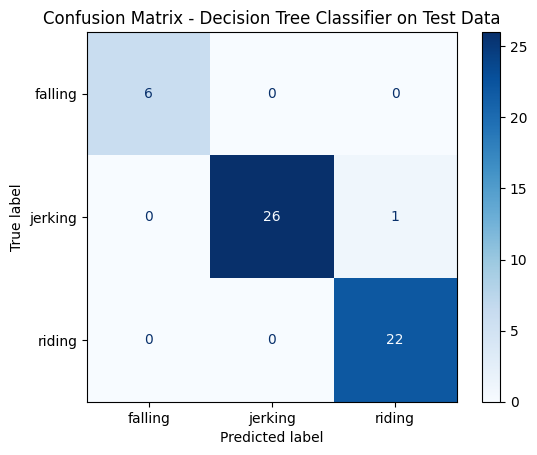

In [44]:
# plot confusion matrix for test data
from sklearn.metrics import ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, test_predict, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree Classifier on Test Data')
plt.show()
